In [1]:
%load_ext autoreload
%autoreload 2

from test_classes import Summary, CvTest
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from PIL import Image
import os

# Note

The tools:
* test_classes.Summary, and 
* test_classes.CvTest 

are custom tools I built for testing but not published yet, will be publishing this on github in the coming weeks

## Experiment name

In [2]:
exp = '202202080823_data=london_model=VGG16_LCM_REG_lr=1e-05'

## Summary results

In [3]:
summ = Summary()
summ.get_results(exp)

,,dataset,architecture,lr,mae,mse,mae_idx,mse_idx,trainloss_idx,valloss_idx,steps
experiment,model_name,,,,,,,,,,
202202080823_data=london_model=VGG16_LCM_REG_lr=1e-05,all_ep_18_mae_11.2_mse_15.7.pth,london,VGG16_LCM_REG,1e-05,11.2,15.7,18,18,51,34,52


### Save data to experiment database

In [4]:
summ.update_results()

## Run validation set

In [5]:
test = CvTest(exp)

[2022-02-11 08:16:55] CC: LCM


In [6]:
test.run()

[2022-02-11 08:17:00] [i:0][filename:00_01_51.56383918_-0.16204834_19_1024_1024.jpg][mae: 5.0][gt: 48.4][pred: 53.4]
[2022-02-11 08:17:01] [i:1][filename:00_02_51.56213176_-0.16479492_19_1024_1024.jpg][mae: 49.6][gt: 108.3][pred: 157.9]
[2022-02-11 08:17:02] [i:2][filename:01_00_51.44972793_-0.3062439_19_1024_1024.jpg][mae: 1.7][gt: 42.3][pred: 44.0]
[2022-02-11 08:17:03] [i:3][filename:01_01_51.44972793_-0.30349731_19_1024_1024.jpg][mae: 1.4][gt: 20.9][pred: 22.3]
[2022-02-11 08:17:04] [i:4][filename:04_01_51.53864818_-0.03295898_19_1024_1024.jpg][mae: 4.1][gt: 67.2][pred: 63.1]
[2022-02-11 08:17:05] [i:5][filename:04_03_51.53693981_-0.03295898_19_1024_1024.jpg][mae: 0.3][gt: 36.9][pred: 36.6]
[2022-02-11 08:17:06] [i:6][filename:05_01_51.55402062_-0.04257202_19_1024_1024.jpg][mae: 3.2][gt: 50.7][pred: 47.5]
[2022-02-11 08:17:07] [i:7][filename:07_00_51.51301591_-0.1524353_19_1024_1024.jpg][mae: 18.0][gt: 31.6][pred: 49.6]
[2022-02-11 08:17:08] [i:8][filename:07_03_51.51130658_-0.1496

## Results

In [7]:
df = test.data()
df = df[['filename', 'i', 'gt', 'pred', 'mae', 'mse']]
df[['gt', 'pred', 'mae', 'mse']] = np.round(df[['gt', 'pred', 'mae', 'mse']])
df.sort_values('mae', ascending=False)

,filename,i,gt,pred,mae,mse
21,00_02_51.56213176_-0.16479492_19_1024_1024.jpg,1,108.0,158.0,50.0,2460.0
3,18_01_51.36020541_-0.443573_19_1024_1024.jpg,24,109.0,141.0,32.0,1024.0
30,08_01_51.54334586_-0.16204834_19_1024_1024.jpg,10,46.0,75.0,29.0,829.0
18,16_01_51.45785765_-0.16067505_19_1024_1024.jpg,20,98.0,69.0,29.0,853.0
4,18_03_51.35849035_-0.443573_19_1024_1024.jpg,25,109.0,138.0,28.0,812.0
17,22_00_51.42019202_0.02677917_19_1024_1024.jpg,30,113.0,92.0,22.0,471.0
33,11_03_51.51643438_-0.0453186_19_1024_1024.jpg,13,58.0,37.0,21.0,437.0
11,24_01_51.43432027_-0.27740479_19_1024_1024.jpg,32,211.0,190.0,21.0,437.0
27,07_00_51.51301591_-0.1524353_19_1024_1024.jpg,7,32.0,50.0,18.0,324.0
10,22_01_51.42019202_0.02952576_19_1024_1024.jpg,31,214.0,196.0,18.0,328.0


## Inspect individual images

In [8]:
ti = test.pred(1)

[2022-02-11 08:17:39] [i:1][filename:00_02_51.56213176_-0.16479492_19_1024_1024.jpg][mae: 49.6][gt: 108.3][pred: 157.9]


In [9]:
ti

[img_raw: (1024, 1024)]
[img: torch.Size([1, 3, 1024, 1024])]
[gt_raw: (1024, 1024)]
[gt: (1, 16, 16)]
[pred_map: (16, 16)]
[pred_map_resize: (128, 128)]

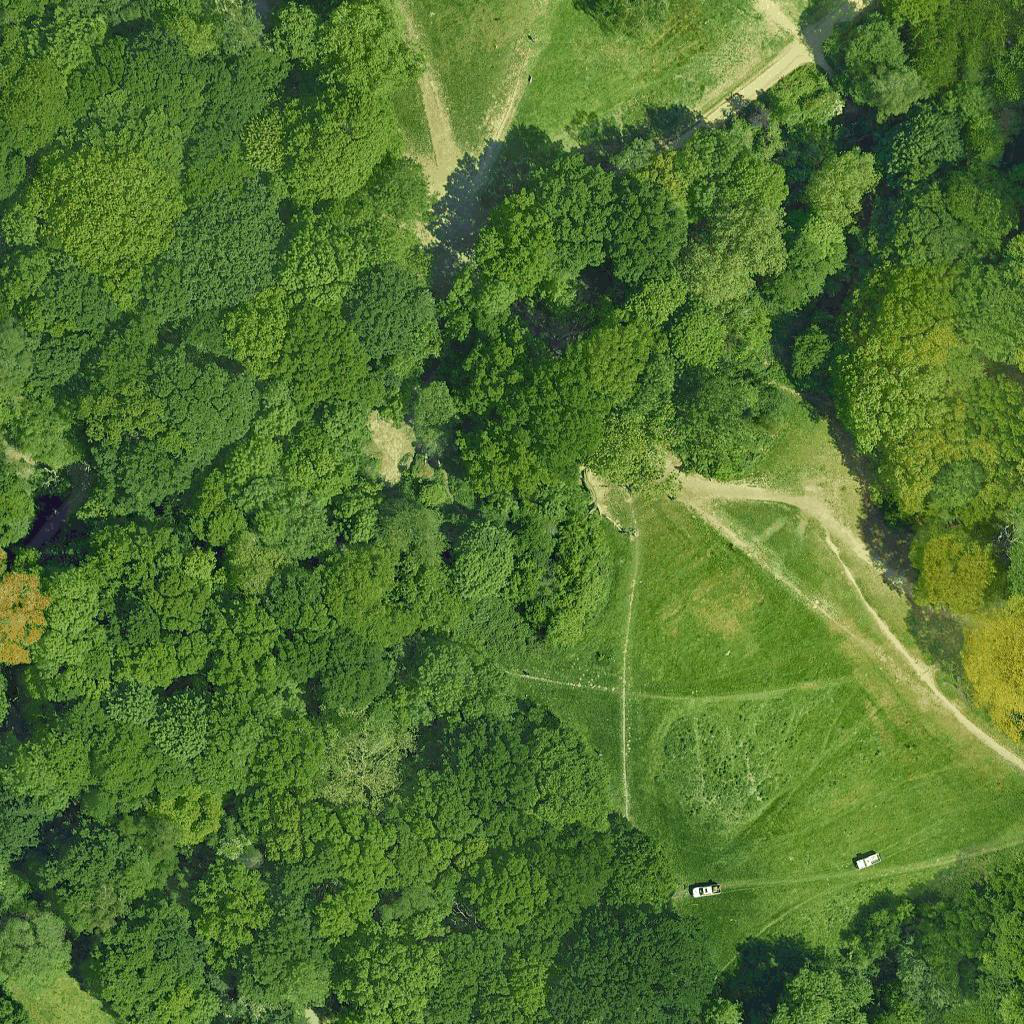

In [10]:
ti.img_raw

## Ground truth

### GT raw

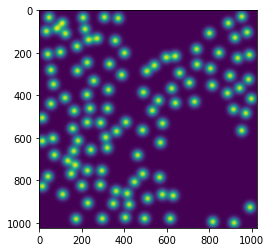

In [11]:
plt.imshow(ti.gt_raw.squeeze())

### GT processed

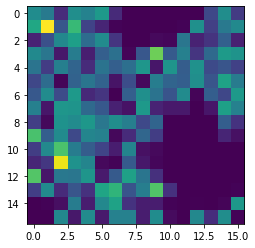

In [12]:
plt.imshow(ti.gt.squeeze())

## Prediction

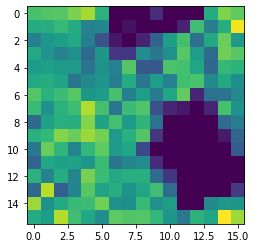

In [13]:
plt.imshow(ti.pred_map.squeeze())

## Differences

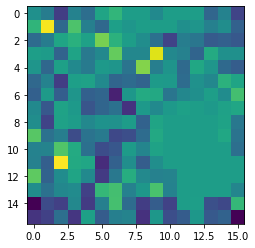

In [14]:
plt.imshow(ti.gt.squeeze() - ti.pred_map.squeeze())

### Absolute differences

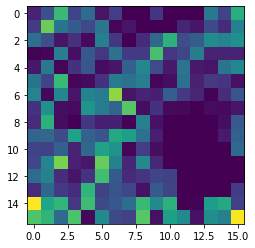

In [15]:
plt.imshow(abs(ti.gt.squeeze() - ti.pred_map.squeeze()))